In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import classification_report, plot_confusion_matrix
import random 
from matplotlib import pyplot
import math
from math import pi
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from random import seed, shuffle
from scipy.stats import multivariate_normal
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.kernel_approximation import Nystroem
df = pd.read_csv("asters.csv")

/Users/iulia/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
####################################### Analyse des données #######################################
df.shape

(958524, 45)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [4]:
df = df.drop(['name', 'prefix'], axis=1)
df = df.drop(['id', 'spkid', 'equinox','orbit_id','pdes', 'full_name'], axis=1)
df = df.dropna()
df.value_counts(["pha"])
df['pha'] = df['pha'].map({'Y': 1, 'N': 0})
df['neo'] = df['neo'].map({'Y': 1, 'N': 0})
# nb Y in pha changes

In [5]:
#combien d'asteroids avec un diametre "moyen" il y a ?
#eliminer les asteroids qui ont un diametre >2 km
df1 = df[(df.diameter>2)].index
df.drop (df1, inplace = True)
df.shape

(11524, 37)

In [6]:
df["pha"].value_counts() #Potentially Hasardous Asteroid

0    11355
1      169
Name: pha, dtype: int64

In [7]:
# Les asteroids candidats sont generalement de type APO,ATE et AMO (ellipses)
# utiliser pour la description des classes
df.value_counts(["class", "pha"])

class  pha
MBA    0      10506
APO    0        255
IMB    0        245
AMO    0        173
APO    1        133
MCA    0        101
ATE    0         51
       1         30
OMB    0         23
AMO    1          6
CEN    0          1
dtype: int64

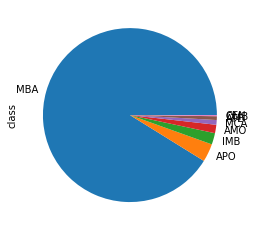

In [8]:
# Analyse des classes des asteroides et des histogrames entre characteristiques. 

ax =df["class"].value_counts(normalize=False).plot(kind='pie')
plt.savefig("pie_classes.pdf")
plt.show()
#df.hist(figsize=(20,20), bins=25, layout=(15,4))
# Display

In [9]:
# NEO - Near Earth Asteroid
# PHA - Potentially Hazardous Asteroid (flag)
# Tous PHAs sont NEO.
df.value_counts(["pha", "neo"])

pha  neo
0    0      10876
     1        479
1    1        169
dtype: int64

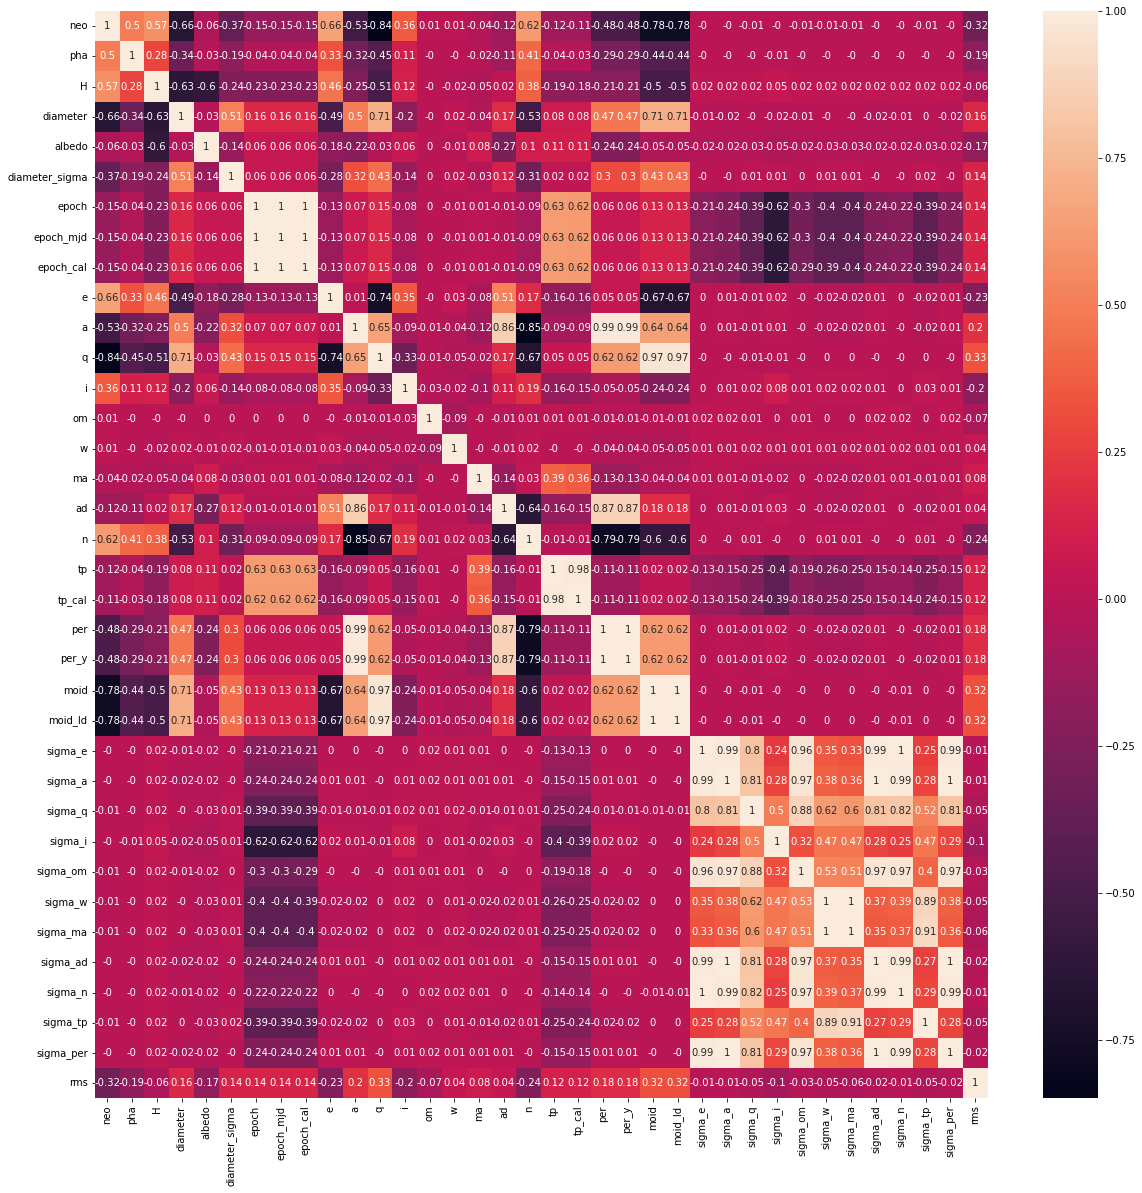

In [10]:
# Correlations entre characteristiques.
# 0 - aucune correlation >0 - correlation positive <0 - correlation negative
plt.figure(figsize=(20,20))
s = sns.heatmap(data=round(df.corr(),2), annot=True)
# s.set_title
# Il y a une correlation positive entre le pha, H et NEO
# Il y a une correlation negative entre MOID et NEO (moid est grand => NEO est generalement 0). 
# Idem pour diametre/perihelion (Voir la partie Theorie: Asters avec diametre grand ne sont pas NEO)
# Il y a une correlation positive accentue entre les valeures de sigma.
# Il y a n une correlation negative entre diametre et H (a cause de la formule. H grand => diametre petit)
plt.savefig("heat_map.pdf")

<AxesSubplot:>

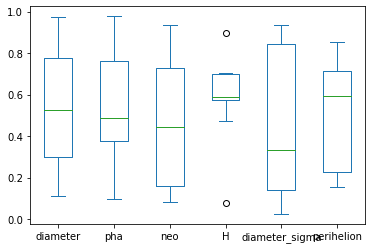

In [11]:
df1 = pd.DataFrame(np.random.rand (10,6), columns=["diameter", "pha", "neo", "H", "diameter_sigma", "perihelion"])
df1.plot.box()

Text(0, 0.5, 'H - abs magnitude')

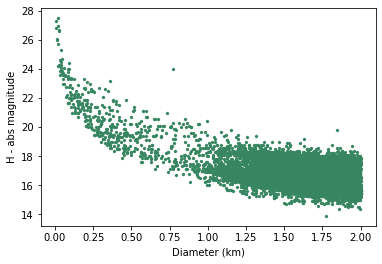

In [12]:
df_scatter = df.copy()
df_scatter.dropna()
plt.scatter(df_scatter['diameter'],df_scatter['H'], color='#378661', marker='x', s=2, linewidth=3)
plt.xlabel('Diameter (km)')
plt.ylabel('H - abs magnitude')

Text(0, 0.5, 'MOID')

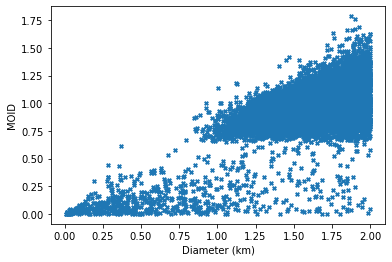

In [13]:
plt.scatter(df_scatter['diameter'],df_scatter['moid'], cmap='blues', marker='x', s=2, linewidth=5)
plt.xlabel('Diameter (km)')
plt.ylabel('MOID')
#Pous la "plupart" des asteroides, plus le diametre est grand, plus il a un MOID grand (=> pas dangereux)

In [14]:
############################### Algo supervisé. Separation lineaire. Kernel (impossible) ############################

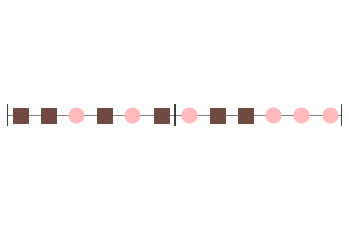

<Figure size 432x288 with 0 Axes>

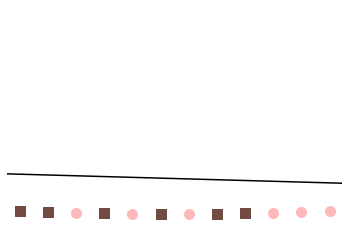

Accuracy of 77.00


<Figure size 432x288 with 0 Axes>

In [15]:
df1 = df[df.neo==1]
df2 = df1.copy()
df2 = df2.sort_values(by =['q'])
df2.drop(df1.index[100:722], inplace=True)
df2.shape


X1=np.linspace(-50,50,100) 
Y1=np.array(df2.pha)
C=np.ones(len(df2.pha))
C= 2*C

fig = plt.figure()
ax = fig.add_subplot(111)
# dessiner lignes
xmin = -6
xmax = 6
y = 2
height = 1
ax.set_xlim(xmin,xmax)
ax.set_ylim(y-2,y+2)
plt.hlines(y, xmin, xmax,'k',linewidth=0.5)
plt.vlines(xmin, 1.8, 2.2,'k')
plt.vlines(xmax, 1.8, 2.2,'k')
plt.vlines(0, 1.8, 2.2,'k')
plt.plot(X1[Y1==1],C[Y1==1], 'o', ms = 15, color='#FFB9BA')
plt.plot(X1[Y1==0],C[Y1==0], 's', ms = 15, color='#714A41')
plt.axis('off')
plt.show()
plt.savefig('sep-1.png')

#R2
X1_p=X1[:]
X2_p=X1[:]*X1[:]
X1_PRO=np.c_[X1_p, X2_p]
fig = plt.figure()
ax  = fig.add_subplot(111)
plt.scatter(X1_PRO[Y1==1][:, 0], X1_PRO[Y1==1][:, 1], color='#FFB9BA', marker='o', s = 100)
plt.scatter(X1_PRO[Y1==0][:, 0], X1_PRO[Y1==0][:, 1], color='#714A41', marker='s', s=100)
ax.set_xlim(-6,6)
model = svm.SVC(kernel='linear')
clf = model.fit(X1_PRO, Y1)
x = np.linspace(-6,6,30)
z = (-clf.intercept_[0]-clf.coef_[0][0]*x) / clf.coef_[0][1]
ax.plot(x,z,'k')
y_pred=clf.predict(X1_PRO)
plt.axis('off')
plt.show()
plt.savefig('sep-2.png')
print("Accuracy of %.2f" %(metrics.accuracy_score(Y1, y_pred)*100))

In [16]:
############################### Entrainement, test et validations des modeles #################################

In [17]:
# Algorithms d'appantissage avec differentes dimensions. 

In [18]:
df= pd.get_dummies(df) # binariser la colonne class (transformer des variables categorielles dans des indicateurs categoriels)

In [19]:
df1 = df[["diameter", "moid"]]
X_2 = df1.to_numpy()
df_pha = df.pha
y_2 = df_pha.to_numpy()

In [20]:
C=10
svm_clf = SVC(kernel = 'linear', C=C).fit(X_2,y_2)

In [21]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFFFFF')
    plt.plot(x0, decision_boundary, "k-", linewidth=2, label="SVM")
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

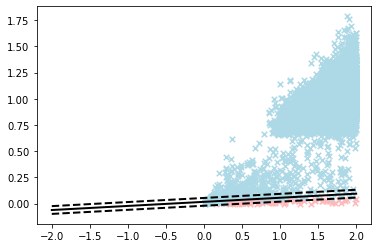

<Figure size 432x288 with 0 Axes>

In [22]:
    
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.scatter(X_2[y_2==1][:, 0], X_2[y_2==1][:, 1], color='#FFB9BA', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_2[y_2==0][:, 0], X_2[y_2==0][:, 1], color='#ADD8E6', marker='x', s=30, linewidth=1.5, label = "Class -1")
plt.show() 
plt.savefig("svm_l.pdf")


In [23]:
# nb_samples = 100
#Ici on melange les donnees (pour Random Subsampling)
n_size = 100
perm = list(range(0,n_size*2))
shuffle(perm)
X_r = X_2[perm]
y_r = y_2[perm]
####################

n=np.shape(X_r)[0]
n_train=int(0.5*n)

X_r_training=X_r[0:n_train,:]
y_r_training=y_r[0:n_train]

X_r_testing=X_r[n_train:(n_train+math.floor((n-n_train)/2)),:]
y_r_testing=y_r[n_train:(n_train+math.floor((n-n_train)/2))]

X_r_validation=X_r[(n_train+math.floor((n-n_train)/2)):n,:]
y_r_validation=y_r[(n_train+math.floor((n-n_train)/2)):n]

y_pred_training=svm_clf.predict(X_r_training)
y_pred_testing=svm_clf.predict(X_r_testing)
y_pred_validation=svm_clf.predict(X_r_validation)
 
 
Accuracy_training_r=(metrics.accuracy_score(y_r_training, y_pred_training)*100)
Accuracy_testing_r=(metrics.accuracy_score(y_r_testing, y_pred_testing)*100)
Accuracy_validation_r=(metrics.accuracy_score(y_r_validation, y_pred_validation)*100)
    
print("Accuracy training (SVC)",Accuracy_training_r)
print("Accuracy testing (SVC)",Accuracy_testing_r)
print("Accuracy validation (SCV)",Accuracy_validation_r)


Accuracy training (SVC) 98.0
Accuracy testing (SVC) 96.0
Accuracy validation (SCV) 100.0


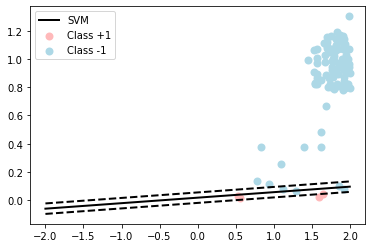

In [24]:

plot_svc_decision_boundary(svm_clf, -2, 2)
plt.scatter(X_r_training[y_r_training==1][:, 0], X_r_training[y_r_training==1][:, 1], color='#FFB9BA', marker='o', s=30, linewidth=2.5, label= "Class +1")
plt.scatter(X_r_training[y_r_training==0][:, 0], X_r_training[y_r_training==0][:, 1], color='#ADD8E6', marker='o', s=30, linewidth=2.5, label = "Class -1")


plt.legend(loc=2, fontsize=10)

plt.show()

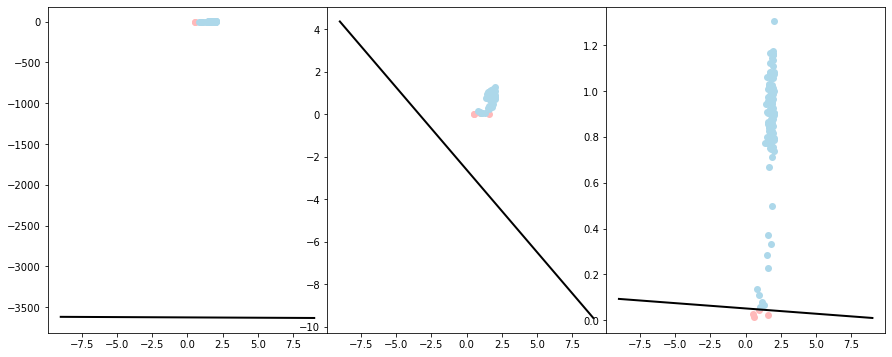

In [25]:
# SVM Classifier model ( pour 3 valeurs différentes de 𝐶)
#the hyperparameter C control the margin violations
#smaller C leads to more margin violations but wider margin
# C influences soft-margin SVM ---- course 4- pag 22/48
# here C_i is C/n . So C = n* [10^-a,.....,1-^0,.....10^a]
####################
#AVEC PERMUTATIONS
#n_size = nb samples

n_size = 100
perm = list(range(0,n_size*2))
shuffle(perm)
X_r = X_2[perm]
y_r = y_2[perm]
####################

n=np.shape(X_r)[0]
n_train=int(0.5*n)

X_r_training=X_r[0:n_train,:]
y_r_training=y_r[0:n_train]

X_r_testing=X_r[n_train:(n_train+math.floor((n-n_train)/2)),:]
y_r_testing=y_r[n_train:(n_train+math.floor((n-n_train)/2))]

X_r_validation=X_r[(n_train+math.floor((n-n_train)/2)):n,:]
y_r_validation=y_r[(n_train+math.floor((n-n_train)/2)):n]

####################

n=np.shape(X_r)[0]
n_train=int(0.5*n)

fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()
C_i=[0.001,1,1000]
C_range=np.shape(C_i)[0]
Accuracy_training=np.empty([C_range])
mse_training=np.empty([C_range])
Accuracy_testing=np.empty([C_range])
Accuracy_validation=np.empty([C_range])
for i in range(C_range):
    
    svm_clf = SVC(kernel="linear", C=C_i[i])
    svm_clf.fit(X_r_training, y_r_training)

    
    axs[i].scatter(X_r_training[y_r_training==1][:, 0], X_r_training[y_r_training==1][:, 1], color='#FFB9BA', marker='o', s=30, linewidth=1.5, label= "Class +1")
    axs[i].scatter(X_r_training[y_r_training==0][:, 0], X_r_training[y_r_training==0][:, 1], color='#ADD8EA', marker='o', s=30, linewidth=1.5, label = "Class -1")
    #plot_svc_decision_boundary(svm_clf, -2, 2)
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(-9, 9, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    axs[i].plot(x0, decision_boundary, "k-", linewidth=2)
    
    y_pred_training=svm_clf.predict(X_r_training)
    y_pred_testing=svm_clf.predict(X_r_testing)
    y_pred_validation=svm_clf.predict(X_r_validation)

    
 
    Accuracy_training[i]=(metrics.accuracy_score(y_r_training, y_pred_training)*100)
    Accuracy_testing[i]=(metrics.accuracy_score(y_r_testing, y_pred_testing)*100)
    Accuracy_validation[i]=(metrics.accuracy_score(y_r_validation, y_pred_validation)*100)
    
    
plt.show() 

In [26]:
# Precision, moyenne et variance pour SVM classifier
print("\t\t     C_1 C_2 C_3")
print("Accuracy training  ",Accuracy_training)
print("Accuracy testing   ",Accuracy_testing)
print("Accuracy validation",Accuracy_validation)

max_t=max(Accuracy_testing)
i_loc=np.where(Accuracy_testing>=max_t)
i_loc=i_loc[0][0]

Final_accuracy=Accuracy_validation[i_loc]
print("The accuracy in the studied dataset is %.2f" %Final_accuracy)
print("La précision moyenne est  %.2f" %np.mean(Final_accuracy))
print("La variance de précision est %.2f" %np.var(Final_accuracy))


		     C_1 C_2 C_3
Accuracy training   [ 96.  96. 100.]
Accuracy testing    [96. 96. 98.]
Accuracy validation [ 90.  90. 100.]
The accuracy in the studied dataset is 100.00
La précision moyenne est  100.00
La variance de précision est 0.00


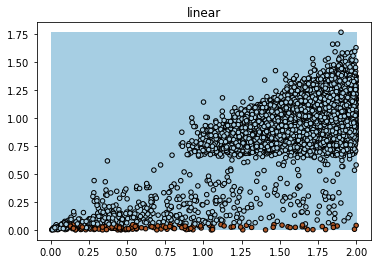

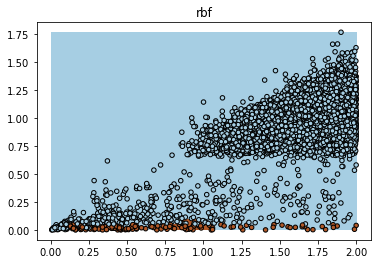

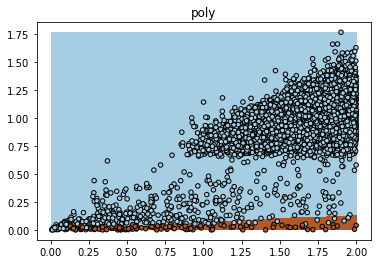

In [59]:
# Kernel
######### dim 2
df1 = df[["diameter", "moid"]]
X_2 = df1.to_numpy()
df_pha = df.pha
y_2 = df_pha.to_numpy()

n_sample = 11000

axs = axs.ravel()

np.random.seed(0)
order = np.random.permutation(n_sample)
X_2 = X_2[order]
y_2 = y_2[order].astype(float)

X_train=X_2[0:n_train,:]
y_train=y_2[0:n_train]

X_test=X_2[n_train:(n_train+math.floor((n-n_train)/2)),:]
y_test=y_2[n_train:(n_train+math.floor((n-n_train)/2))]

X_valid=X_2[n_train+math.floor((n-n_train)/2):n,:]
y_valid=y_2[n_train+math.floor((n-n_train)/2):n]

i=0
for kernel in ("linear", "rbf", "poly"):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)
    plt.figure()
    plt.clf()
    plt.scatter(
        X_2[:, 0], X_2[:, 1], c=y_2, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
    )


    plt.axis("tight")
    x_min = X_2[:, 0].min()
    x_max = X_2[:, 0].max()
    y_min = X_2[:, 1].min()
    y_max = X_2[:, 1].max()
    
    #y_pred_training=clf.predict(X_train)
    #y_pred_testing=clf.predict(X_test)
    #y_pred_validation=clf.predict(X_valid)

 
    #Accuracy_training[i]=(metrics.accuracy_score(y_train, y_pred_training)*100)
    #Accuracy_testing[i]=(metrics.accuracy_score(y_test, y_pred_testing)*100)
    #Accuracy_validation[i]=(metrics.accuracy_score(y_valid, y_pred_validation)*100)
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    i=i+1
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading='auto' )

    plt.title(kernel)
plt.show()


In [61]:
#print("\t\t     C_1 C_2 C_3")
#print("Accuracy training  ",Accuracy_training)
#print("Accuracy testing   ",Accuracy_testing)
#print("Accuracy validation",Accuracy_validation)

#max_t=max(Accuracy_testing)
#i_loc=np.where(Accuracy_testing>=max_t)
#i_loc=i_loc[0][0]

#Final_accuracy=Accuracy_validation[i_loc]
#print("La précision du modele est %.2f" %Final_accuracy)
#print("La précision moyenne est  %.2f" %np.mean(Final_accuracy))
#print("La variance de précision est %.2f" %np.var(Final_accuracy))
# Precision assez bonne.

In [29]:
####################################################################################################
# K-fold Cross Validation (Sauf pre-traitement de donnees)

In [30]:
df

,neo,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,...,sigma_per,rms,class_AMO,class_APO,class_ATE,class_CEN,class_IMB,class_MBA,class_MCA,class_OMB
2101,1,1,16.0,1.649,0.2450,0.045,2459000.5,59000,20200531.0,0.299148,...,6.561300e-07,0.30566,0,1,0,0,0,0,0,0
2200,1,1,15.3,1.800,0.4328,0.100,2459000.5,59000,20200531.0,0.712886,...,7.374100e-06,0.47477,0,1,0,0,0,0,0,0
2494,0,0,15.2,1.696,0.6140,0.154,2459000.5,59000,20200531.0,0.102524,...,3.767100e-06,0.48700,0,0,0,0,1,0,0,0
3799,0,0,15.0,1.624,0.6570,0.128,2459000.5,59000,20200531.0,0.075606,...,1.875400e-06,0.40695,0,0,0,0,0,0,1,0
3907,1,0,17.3,1.000,0.2300,0.150,2459000.5,59000,20200531.0,0.458994,...,3.287300e-06,0.44251,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890439,0,0,17.5,1.912,0.1010,0.508,2459000.5,59000,20200531.0,0.178386,...,1.363100e-02,0.62233,0,0,0,0,0,1,0,0
890597,0,0,17.4,1.604,0.0990,0.172,2459000.5,59000,20200531.0,0.249525,...,3.879800e-02,0.50311,0,0,0,0,0,1,0,0
890954,0,0,19.8,1.849,0.0430,0.207,2459000.5,59000,20200531.0,0.587670,...,8.222500e-04,0.44219,0,0,0,0,0,0,1,0
891570,0,0,18.2,1.077,0.1160,0.237,2459000.5,59000,20200531.0,0.430251,...,2.386600e-03,0.47449,0,0,0,0,0,1,0,0


In [31]:
df1 = df[["diameter", "moid", "H", "neo", "albedo","q", "class_APO", "class_AMO", "class_MBA", "class_ATE"]]
X_syn = df1.to_numpy()
df_pha = df.pha
y_syn = df_pha.to_numpy()
# dimension = 10

In [32]:
def Kfold_tp(n_samples,C_values,X_syn,y_syn): 
    #Instance 1:
    n_size=n_samples
    X_syn=X_syn
    y_syn=y_syn
    n=np.shape(X_syn)[0]
    n_train=int(0.5*n)

    X_syn_training=X_syn[0:n_train,:]
    y_syn_training=y_syn[0:n_train]

    X_syn_testing=X_syn[n_train:(n_train+math.floor((n-n_train)/2)),:]
    y_syn_testing=y_syn[n_train:(n_train+math.floor((n-n_train)/2))]

    X_syn_validation=X_syn[(n_train+math.floor((n-n_train)/2)):n,:]
    y_syn_validation=y_syn[(n_train+math.floor((n-n_train)/2)):n]

    C_i=C_values
   
  
    C_range=np.shape(C_i)[0]
    Accuracy_training=np.empty([C_range])
    Accuracy_testing=np.empty([C_range])
    Accuracy_validation=np.empty([C_range])
    Final_accuracy=np.empty(2)
    for i in range(C_range):
    
        #axs[i].contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)
        #axs[i].set_title(str(250+i))
        svm_clf = SVC(kernel="linear", C=float(C_i[i]))
        svm_clf.fit(X_syn_training, y_syn_training)
        y_pred_training=svm_clf.predict(X_syn_training)
        y_pred_testing=svm_clf.predict(X_syn_testing)
        y_pred_validation=svm_clf.predict(X_syn_validation)

        Accuracy_training[i]=(metrics.accuracy_score(y_syn_training, y_pred_training)*100)
        Accuracy_testing[i]=(metrics.accuracy_score(y_syn_testing, y_pred_testing)*100)
        Accuracy_validation[i]=(metrics.accuracy_score(y_syn_validation, y_pred_validation)*100)


    print("\t\t     C_1 C_2 C_3")
    print("Accuracy training  ",Accuracy_training)
    print("Accuracy testing   ",Accuracy_testing)
    print("Accuracy validation",Accuracy_validation)

    max_t=max(Accuracy_testing)
    i_loc=np.where(Accuracy_testing>=max_t)
    i_loc=i_loc[0][0]

    Final_accuracy[0]=Accuracy_validation[i_loc]


    #Instance 2:
    #We shuffle the data
    perm = list(range(0,n_size*2))
    shuffle(perm)
    X_syn = X_syn[perm]
    y_syn = y_syn[perm]

    #Generate training, testing and validation:
    n=np.shape(X_syn)[0]
    n_train=int(0.4*n)

    X_syn_training=X_syn[0:n_train,:]
    y_syn_training=y_syn[0:n_train]

    X_syn_testing=X_syn[n_train:(n_train+math.floor((n-n_train)/2)),:]
    y_syn_testing=y_syn[n_train:(n_train+math.floor((n-n_train)/2))]

    X_syn_validation=X_syn[(n_train+math.floor((n-n_train)/2)):n,:]
    y_syn_validation=y_syn[(n_train+math.floor((n-n_train)/2)):n]




    #And we solve the correspondins SVMS

    # SVM Classifier model
    #the hyperparameter C control the margin violations
    #smaller C leads to more margin violations but wider margin

    Accuracy_training=np.empty([C_range])
    Accuracy_testing=np.empty([C_range])
    Accuracy_validation=np.empty([C_range])
    for i in range(C_range):
    
     
        svm_clf = SVC(kernel="linear", C=float(C_i[i]))
        svm_clf.fit(X_syn_training, y_syn_training)
  
        y_pred_training=svm_clf.predict(X_syn_training)
        y_pred_testing=svm_clf.predict(X_syn_testing)
        y_pred_validation=svm_clf.predict(X_syn_validation)

 
        Accuracy_training[i]=(metrics.accuracy_score(y_syn_training, y_pred_training)*100)
        Accuracy_testing[i]=(metrics.accuracy_score(y_syn_testing, y_pred_testing)*100)
        Accuracy_validation[i]=(metrics.accuracy_score(y_syn_validation, y_pred_validation)*100)
    
    

    
    print("\t\t     C_1 C_2 C_3")
    print("(Random) Accuracy training  ",Accuracy_training)
    print("(Random) Accuracy testing   ",Accuracy_testing)
    print("(Random) Accuracy validation",Accuracy_validation)

    max_t=max(Accuracy_testing)
    i_loc=np.where(Accuracy_testing>=max_t)
    i_loc=i_loc[0][0]

    Final_accuracy[1]=Accuracy_validation[i_loc]
    print("La précision sauf randomiser est %.2f" %Final_accuracy[0])
    print("La précision (random) est %.2f" %Final_accuracy[1])
    print("La précision moyenne est  %.2f" %np.mean(Final_accuracy))
    print("La variance de précision est %.2f" %np.var(Final_accuracy))



C_param=np.array([0.00001,1,100000])
Kfold_tp(100,C_param,X_syn,y_syn)

		     C_1 C_2 C_3
Accuracy training   [ 99.16695592  99.56612287 100.        ]
Accuracy testing    [ 98.92398473  99.13224575 100.        ]
Accuracy validation [96.87608469 93.99514058 98.02152031]
		     C_1 C_2 C_3
(Random) Accuracy training   [ 93.75  95.   100.  ]
(Random) Accuracy testing    [95.         98.33333333 95.        ]
(Random) Accuracy validation [95.         91.66666667 98.33333333]
La précision sauf randomiser est 98.02
La précision (random) est 91.67
La précision moyenne est  94.84
La variance de précision est 10.10


In [33]:
# K-fold pour k=10
for i in range(0,10):
    print('Iteration ',i)
    Kfold_tp(100,[0.00001,0.001,1,100,100000],X_syn,y_syn)



Iteration  0
		     C_1 C_2 C_3
Accuracy training   [ 99.16695592  99.16695592  99.56612287  99.94793474 100.        ]
Accuracy testing    [ 98.92398473  98.92398473  99.13224575  99.96528983 100.        ]
Accuracy validation [96.87608469 96.87608469 93.99514058 97.70912877 98.02152031]
		     C_1 C_2 C_3
(Random) Accuracy training   [ 93.75  93.75  96.25  97.5  100.  ]
(Random) Accuracy testing    [96.66666667 96.66666667 96.66666667 96.66666667 95.        ]
(Random) Accuracy validation [93.33333333 93.33333333 91.66666667 96.66666667 95.        ]
La précision sauf randomiser est 98.02
La précision (random) est 93.33
La précision moyenne est  95.68
La variance de précision est 5.49
Iteration  1
		     C_1 C_2 C_3
Accuracy training   [ 99.16695592  99.16695592  99.56612287  99.94793474 100.        ]
Accuracy testing    [ 98.92398473  98.92398473  99.13224575  99.96528983 100.        ]
Accuracy validation [96.87608469 96.87608469 93.99514058 97.70912877 98.02152031]
		     C_1 C_2 C_3
(

In [34]:
from sklearn.model_selection import StratifiedKFold
# Stratified K-fold
skf = StratifiedKFold(n_splits=10,random_state=None,shuffle=False)

i=0
for train_index,test_index in skf.split(X_syn,y_syn):
    #print("Train:", X_syn[train_index], "Test:",X_syn[test_index])
    print(" Iteration: ", i)
    i=i+1
    print()
    Kfold_tp(100,[0.00001,0.001,1,100,100000],X_syn,y_syn)

 Iteration:  0

		     C_1 C_2 C_3
Accuracy training   [ 99.16695592  99.16695592  99.56612287  99.94793474 100.        ]
Accuracy testing    [ 98.92398473  98.92398473  99.13224575  99.96528983 100.        ]
Accuracy validation [96.87608469 96.87608469 93.99514058 97.70912877 98.02152031]
		     C_1 C_2 C_3
(Random) Accuracy training   [ 93.75  93.75  97.5  100.   100.  ]
(Random) Accuracy testing    [95.         95.         95.         96.66666667 96.66666667]
(Random) Accuracy validation [95.         95.         95.         96.66666667 96.66666667]
La précision sauf randomiser est 98.02
La précision (random) est 96.67
La précision moyenne est  97.34
La variance de précision est 0.46
 Iteration:  1

		     C_1 C_2 C_3
Accuracy training   [ 99.16695592  99.16695592  99.56612287  99.94793474 100.        ]
Accuracy testing    [ 98.92398473  98.92398473  99.13224575  99.96528983 100.        ]
Accuracy validation [96.87608469 96.87608469 93.99514058 97.70912877 98.02152031]
		     C_1 C_2

In [35]:
################################################################################################################

In [36]:
# Algos avec toutes les colonnes. y_pred = PHA
X = df.drop('pha', axis=1)
y = df['pha']
df

,neo,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,...,sigma_per,rms,class_AMO,class_APO,class_ATE,class_CEN,class_IMB,class_MBA,class_MCA,class_OMB
2101,1,1,16.0,1.649,0.2450,0.045,2459000.5,59000,20200531.0,0.299148,...,6.561300e-07,0.30566,0,1,0,0,0,0,0,0
2200,1,1,15.3,1.800,0.4328,0.100,2459000.5,59000,20200531.0,0.712886,...,7.374100e-06,0.47477,0,1,0,0,0,0,0,0
2494,0,0,15.2,1.696,0.6140,0.154,2459000.5,59000,20200531.0,0.102524,...,3.767100e-06,0.48700,0,0,0,0,1,0,0,0
3799,0,0,15.0,1.624,0.6570,0.128,2459000.5,59000,20200531.0,0.075606,...,1.875400e-06,0.40695,0,0,0,0,0,0,1,0
3907,1,0,17.3,1.000,0.2300,0.150,2459000.5,59000,20200531.0,0.458994,...,3.287300e-06,0.44251,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890439,0,0,17.5,1.912,0.1010,0.508,2459000.5,59000,20200531.0,0.178386,...,1.363100e-02,0.62233,0,0,0,0,0,1,0,0
890597,0,0,17.4,1.604,0.0990,0.172,2459000.5,59000,20200531.0,0.249525,...,3.879800e-02,0.50311,0,0,0,0,0,1,0,0
890954,0,0,19.8,1.849,0.0430,0.207,2459000.5,59000,20200531.0,0.587670,...,8.222500e-04,0.44219,0,0,0,0,0,0,1,0
891570,0,0,18.2,1.077,0.1160,0.237,2459000.5,59000,20200531.0,0.430251,...,2.386600e-03,0.47449,0,0,0,0,0,1,0,0


In [37]:
# SVC, KNeighbours, RandomForestClassifier precisions.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#test = 30% train = 70% (random split)

In [39]:
#Prepocessing data => Meilleurs resultats
scaler = StandardScaler() #Normaliser les caractéristiques(Supprimer la moyenne et mettre à l'échelle la variance unitaire).
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test
#la sortie de la transformation se présente sous la forme d'un tableau dans lequel les points de données varient de 0 à 1.

array([[-0.24478798, -0.27598898,  1.02266915, ...,  0.30851241,
        -0.08872456, -0.04595719],
       [-0.24478798, -0.53177668,  0.3841439 , ...,  0.30851241,
        -0.08872456, -0.04595719],
       [-0.24478798,  0.40611154, -0.49237712, ...,  0.30851241,
        -0.08872456, -0.04595719],
       ...,
       [-0.24478798,  0.91768693, -0.53591293, ...,  0.30851241,
        -0.08872456, -0.04595719],
       [-0.24478798,  0.23558641, -1.08156178, ...,  0.30851241,
        -0.08872456, -0.04595719],
       [-0.24478798, -0.44651411, -0.42562221, ...,  0.30851241,
        -0.08872456, -0.04595719]])

In [40]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
        
    return model_scores

In [41]:
models = {'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC(),
          'RandomForestClassifier': RandomForestClassifier()}

In [42]:
baseline_model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
baseline_model_scores

,Score
KNeighborsClassifier,0.986119
SVC,0.988143
RandomForestClassifier,0.998554


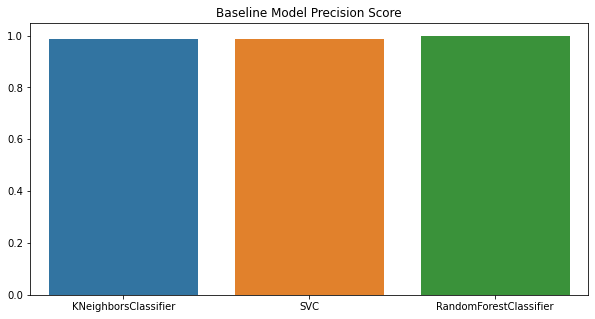

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(data=baseline_model_scores.sort_values('Score').T)
plt.title('Baseline Model Precision Score')
plt.xticks(rotation=0);

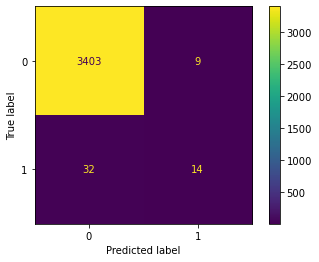

In [44]:
# SVC - Confusion matrix (ok...)
model_svc = SVC()
model_svc.fit(X_train,y_train)
y_preds = model_svc.predict(X_test)
plot_confusion_matrix(model_svc, X_test, y_test)

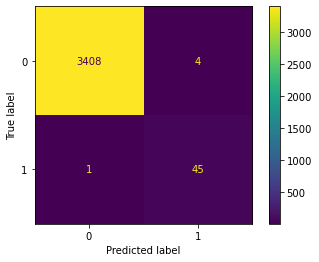

In [45]:
#Random Forest Classufier - confusion matrix (best)
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train,y_train)
y_preds = model_rfc.predict(X_test)
plot_confusion_matrix(model_rfc, X_test, y_test)

In [46]:
#model_knc = KNeighborsClassifier() # pire que SVC
#model_knc.fit(X_train,y_train)
#y_preds = model_knc.predict(X_test)
#plot_confusion_matrix(model_knc, X_test, y_test)

In [47]:
# Precision, moyenne et variance pour SVC
# cv = k(folds). Pour specifier le nombre de folds dans un (Stratified)KFold.
# On evalue les scores obtenu par Cross-Validation
cv_acc_svc = cross_val_score(model_svc,X,y,cv=10,
                         scoring='accuracy')
print("La precision de SVC pour 10 iterations:")
print(cv_acc_svc)
cv_mean_svc = cv_acc_svc.mean()
print("La moyenne (SVC):",cv_mean_svc)
cv_var_svc = cv_acc_svc.var()
print("La variance (SVC):",cv_var_svc)

La precision de SVC pour 10 iterations:
[0.98525585 0.98525585 0.98525585 0.98525585 0.98524306 0.98524306
 0.98524306 0.98524306 0.98524306 0.98611111]
La moyenne (SVC): 0.9853349806061482
La variance (SVC): 6.69673529002155e-08


In [48]:
cv_acc_rfc = cross_val_score(model_rfc,X,y,cv=10,
                         scoring='accuracy')
print("La precision de RFC pour 10 iterations:")
print(cv_acc_rfc)
cv_mean_rfc = cv_acc_rfc.mean()
print("La moyenne (RFC):",cv_mean_rfc)
cv_var_rfc = cv_acc_rfc.var()
print("La variance (RFC):",cv_var_rfc)

La precision de RFC pour 10 iterations:
[1.         1.         1.         1.         1.         1.
 1.         1.         0.98958333 0.97135417]
La moyenne (RFC): 0.99609375
La variance (RFC): 7.765028211805569e-05


In [49]:
#Nous considerons que le meilleur algorithm est RandomForestClassifier
#Il a une precision tres grande et une variance assez petite

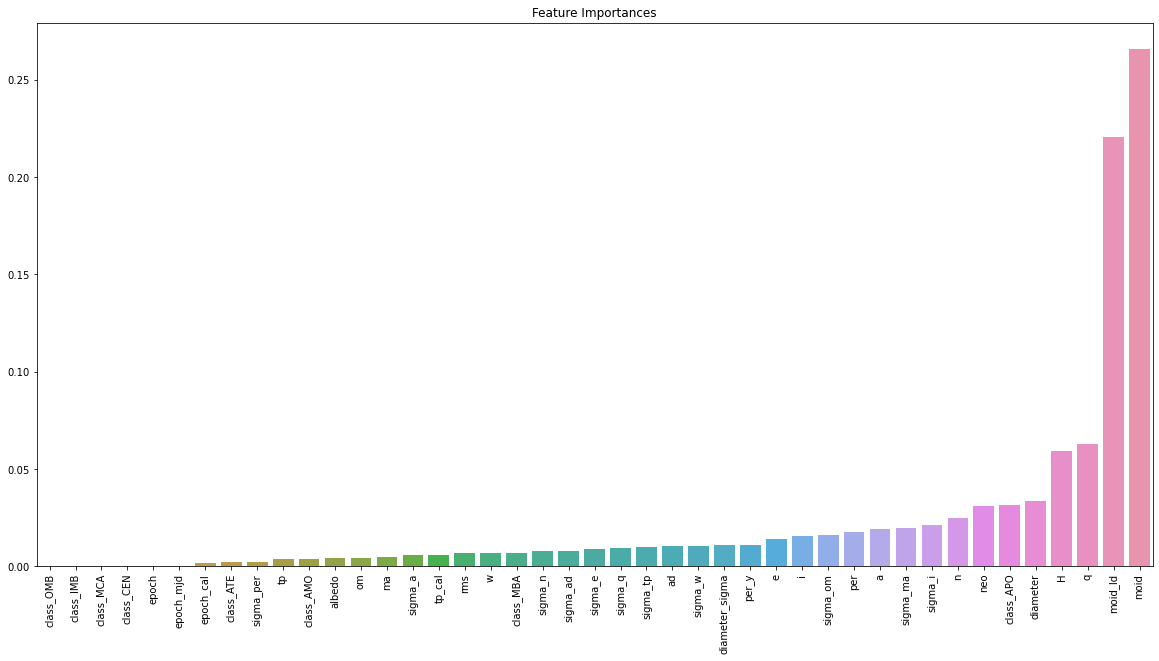

In [50]:
#On veut savoir quelles sont les characteristiques les plus importantes dans la base de donnees
feat_importances = pd.DataFrame(model_rfc.feature_importances_, index=X.columns)
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title('Feature Importances')
sns.barplot(data= feat_importances.sort_values(0).T);
# La plus importante characteristique le MOID (moid_ld)
# H-magnitude absolue, la classe APO et le diametre sont aussi relevantes. 
# Ces resultats sont confirmees par l'ESA (MOID<0.05 et H<22.0 => PHA =1) (voir la partie Theorie du projet)